In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf

x_train = pd.read_csv(r"C:\Users\15485\Desktop\UWaterloo_Academics\ECE657A\Assignments\Assignment3\ece657a-1231-asg3-fashionmnist-datafiles\ece657a-1221-asg3-fashionmnist-datafiles\x_train.csv")
x_test = pd.read_csv(r"C:\Users\15485\Desktop\UWaterloo_Academics\ECE657A\Assignments\Assignment3\ece657a-1231-asg3-fashionmnist-datafiles\ece657a-1221-asg3-fashionmnist-datafiles\x_test.csv")
y_train = pd.read_csv(r"C:\Users\15485\Desktop\UWaterloo_Academics\ECE657A\Assignments\Assignment3\ece657a-1231-asg3-fashionmnist-datafiles\ece657a-1221-asg3-fashionmnist-datafiles\y_train.csv")
y_train = np.array(y_train).flatten()
y_test = pd.read_csv(r"C:\Users\15485\Desktop\UWaterloo_Academics\ECE657A\Assignments\Assignment3\ece657a-1231-asg3-fashionmnist-datafiles\ece657a-1221-asg3-fashionmnist-datafiles\y_test.csv")
y_test = np.array(y_test).flatten()

# x_train = np.reshape(x_train, (x_train.shape[0], 784))
# x_test = np.reshape(x_test, (x_test.shape[0], 784))

# y_train = np.reshape(y_train, (y_train.shape[0],))
# y_test = np.reshape(y_test, (y_test.shape[0],))

print("Shape of x_train data:", x_train.shape)
print("Shape of y_train data:", y_train.shape)
print("Shape of x_test data:", x_test.shape)
print("Shape of y_test data:", y_test.shape)


Shape of x_train data: (60000, 784)
Shape of y_train data: (60000,)
Shape of x_test data: (10000, 784)
Shape of y_test data: (10000,)


In [2]:
x_train.head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,119,114,130,76,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,22,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,33,96,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
num_classes = len(set(y_train))
unique_classes = set(y_train)

In [4]:
print(f'Number of classes: {num_classes}') 
print(f'Unique classes: {unique_classes}') 

Number of classes: 5
Unique classes: {0, 1, 2, 3, 4}


In [5]:
print(y_train[0])

4


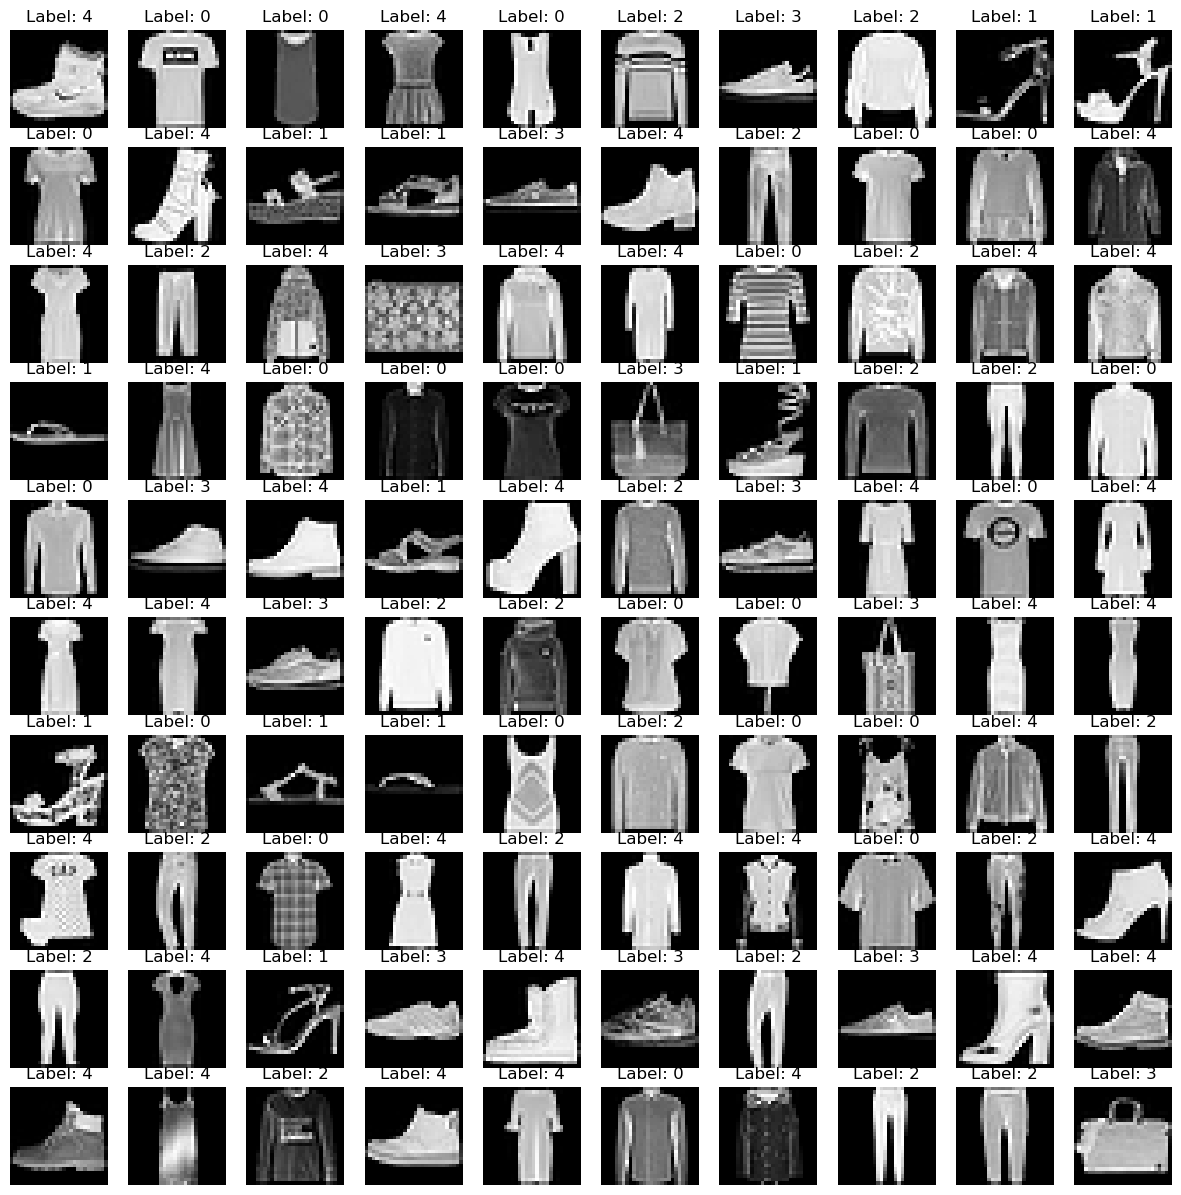

In [6]:
import matplotlib.pyplot as plt
# Reshape the images to their original dimensions
x_train_images = x_train.values.reshape(-1, 28, 28)
x_test_images = x_test.values.reshape(-1, 28, 28)

# Visualize some samples
plt.figure(figsize=(15, 15))
for i in range(100):
    plt.subplot(10, 10, i+1)
    plt.imshow(x_train_images[i], cmap='gray')
    plt.title("Label: {}".format(y_train[i]))
    plt.axis('off')
plt.show()

In [7]:
Img_size = 28
X_train = np.array(x_train).reshape(-1, Img_size, Img_size, 1)
Y_train = np.array(y_train)

X_test = np.array(x_test).reshape(-1, Img_size, Img_size, 1)
Y_test = np.array(y_test)

In [8]:
print("Shape of x_train data:", X_train.shape)
print("Shape of y_train data:", Y_train.shape)
print("Shape of x_test data:", X_test.shape)
print("Shape of y_test data:", Y_test.shape)

Shape of x_train data: (60000, 28, 28, 1)
Shape of y_train data: (60000,)
Shape of x_test data: (10000, 28, 28, 1)
Shape of y_test data: (10000,)


In [9]:
from keras.utils import np_utils
Y_train=np_utils.to_categorical(Y_train)
Y_test=np_utils.to_categorical(Y_test)

In [10]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, AveragePooling2D, BatchNormalization
from keras.optimizers import schedules, Adam
from keras.callbacks import LearningRateScheduler
from keras.optimizers import SGD
import math
import tensorflow as tf
# tf.config.set_visible_devices([], 'GPU')

batch_size = 20       
epochs = 10


In [11]:
## Training using SGD default parameters

In [36]:
# Define the CNN model
model_sgd = Sequential()
model_sgd.add(Conv2D(32, (3, 3), activation='relu', strides=(1, 1), padding='same', input_shape=(Img_size, Img_size, 1)))
model_sgd.add(MaxPooling2D((2, 2)))
model_sgd.add(Conv2D(32, (3, 3), activation='relu'))
model_sgd.add(Flatten())
model_sgd.add(Dense(5))
model_sgd.add(Activation('softmax'))
#model_sgd.summary()
# lr_schedule = keras.optimizers.schedules.ExponentialDecay(
#     initial_learning_rate=1e-3,
#     decay_steps=10000,
#     decay_rate=0.9)
# opt = keras.optimizers.Adam(learning_rate=lr_schedule)
# sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
sgd = SGD()
model_sgd.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=sgd)
# lr_scheduler = LearningRateScheduler(lr_schedule)
history_sgd = model_sgd.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, validation_split = 0.1, verbose=1)

score = model_sgd.evaluate(X_test, Y_test, verbose=1)
print('Test accuracy:', score[1]*100)

Epoch 1/10
2700/2700 [==============================] - 9s 3ms/step - loss: 892.6329 - accuracy: 0.6371 - val_loss: 0.6837 - val_accuracy: 0.7203
Epoch 2/10
2700/2700 [==============================] - 8s 3ms/step - loss: 0.6278 - accuracy: 0.7428 - val_loss: 0.5804 - val_accuracy: 0.7665
Epoch 3/10
2700/2700 [==============================] - 8s 3ms/step - loss: 0.5667 - accuracy: 0.7708 - val_loss: 0.5471 - val_accuracy: 0.7843
Epoch 4/10
2700/2700 [==============================] - 9s 3ms/step - loss: 0.5319 - accuracy: 0.7899 - val_loss: 0.5063 - val_accuracy: 0.7972
Epoch 5/10
2700/2700 [==============================] - 8s 3ms/step - loss: 0.5088 - accuracy: 0.7991 - val_loss: 0.4886 - val_accuracy: 0.7997
Epoch 6/10
2700/2700 [==============================] - 8s 3ms/step - loss: 0.4899 - accuracy: 0.8072 - val_loss: 0.4686 - val_accuracy: 0.8135
Epoch 7/10
2700/2700 [==============================] - 8s 3ms/step - loss: 0.4769 - accuracy: 0.8135 - val_loss: 0.4610 - val_accurac

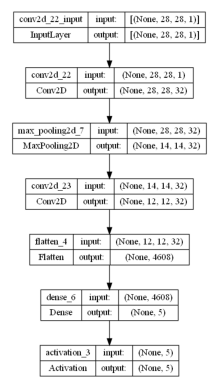

In [37]:
#%%
from keras.utils.vis_utils import plot_model
# Plot the model graph
plot_model(model_sgd, show_shapes=True, show_layer_names=True, to_file=r'C:\Users\15485\Desktop\UWaterloo_Academics\ECE657A\Assignments\Assignment3\model_sgd.png')
img = plt.imread(r'C:\Users\15485\Desktop\UWaterloo_Academics\ECE657A\Assignments\Assignment3\model_sgd.png')
plt.imshow(img)
plt.axis('off')
plt.show()


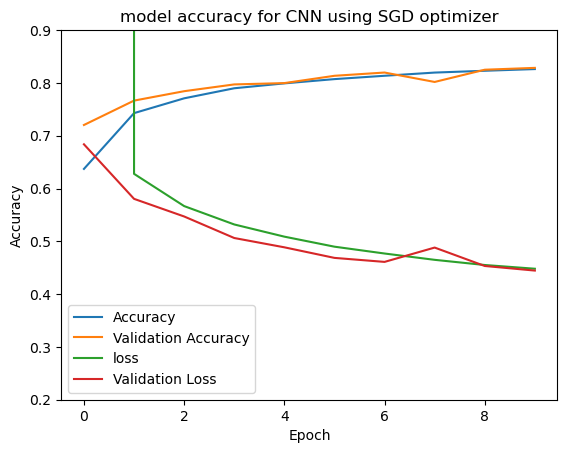

In [38]:
import matplotlib.pyplot as plt
plt.plot(history_sgd.history["accuracy"])
plt.plot(history_sgd.history['val_accuracy'])
plt.plot(history_sgd.history['loss'])
plt.plot(history_sgd.history['val_loss'])
plt.title("model accuracy for CNN using SGD optimizer")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.ylim([0.2, 0.9])
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()

Training using exponential decay SGD to understand how by decreasing the Learning rate, we can get more acciracy as it helps to reach global minimum properly

In [43]:
# Define the model architecture

def lr_schedule(epoch):
    initial_learning_rate = 0.001
    decay_rate = 0.1
    decay_steps = 10000
    learning_rate = initial_learning_rate * math.pow(decay_rate, math.floor((1+epoch)/decay_steps))
    return learning_rate

model_sgd_ed = Sequential()
model_sgd_ed.add(Conv2D(32, (3, 3), activation='relu', strides=(1, 1), padding='same', input_shape=(Img_size, Img_size, 1)))
model_sgd_ed.add(BatchNormalization())  # Add batch normalization layer
model_sgd_ed.add(MaxPooling2D((2, 2)))
model_sgd_ed.add(Conv2D(32, (3, 3), activation='relu'))
model_sgd_ed.add(BatchNormalization())  # Add batch normalization layer
model_sgd_ed.add(Flatten())
model_sgd_ed.add(Dense(5))
model_sgd_ed.add(Activation('softmax'))


# lr_schedule = keras.optimizers.schedules.ExponentialDecay(
#     initial_learning_rate=1e-3,
#     decay_steps=10000,
#     decay_rate=0.9)
# opt = keras.optimizers.Adam(learning_rate=lr_schedule)
# sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
sgd = SGD()
model_sgd_ed.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=sgd)
lr_scheduler = LearningRateScheduler(lr_schedule)
history_sgd_ed = model_sgd_ed.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, validation_split = 0.1, verbose=1, callbacks=[lr_scheduler])

score = model_sgd_ed.evaluate(X_test, Y_test, verbose=1)
print('Test accuracy:', score[1]*100)

Epoch 1/10
2700/2700 [==============================] - 11s 4ms/step - loss: 0.3800 - accuracy: 0.8620 - val_loss: 0.2914 - val_accuracy: 0.8935 - lr: 0.0010
Epoch 2/10
2700/2700 [==============================] - 10s 4ms/step - loss: 0.2598 - accuracy: 0.9085 - val_loss: 0.2527 - val_accuracy: 0.9063 - lr: 0.0010
Epoch 3/10
2700/2700 [==============================] - 10s 4ms/step - loss: 0.2275 - accuracy: 0.9196 - val_loss: 0.2308 - val_accuracy: 0.9153 - lr: 0.0010
Epoch 4/10
2700/2700 [==============================] - 10s 4ms/step - loss: 0.2085 - accuracy: 0.9266 - val_loss: 0.2220 - val_accuracy: 0.9163 - lr: 0.0010
Epoch 5/10
2700/2700 [==============================] - 10s 4ms/step - loss: 0.1937 - accuracy: 0.9329 - val_loss: 0.2146 - val_accuracy: 0.9213 - lr: 0.0010
Epoch 6/10
2700/2700 [==============================] - 10s 4ms/step - loss: 0.1843 - accuracy: 0.9347 - val_loss: 0.2185 - val_accuracy: 0.9203 - lr: 0.0010
Epoch 7/10
2700/2700 [==============================

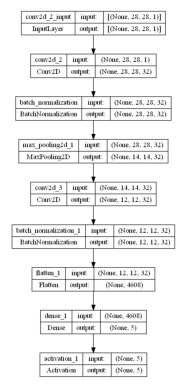

In [18]:
from keras.utils.vis_utils import plot_model
# Plot the model graph
plot_model(model_sgd_ed, show_shapes=True, show_layer_names=True, to_file=r'C:\Users\15485\Desktop\UWaterloo_Academics\ECE657A\Assignments\Assignment3\model_sgd_ed.png')
img = plt.imread(r'C:\Users\15485\Desktop\UWaterloo_Academics\ECE657A\Assignments\Assignment3\model_sgd_ed.png')
plt.imshow(img)
plt.axis('off')
plt.show()

1/1 [==============================] - ETA: 0s

C:\Users\15485\AppData\Local\Temp\ipykernel_19804\4062265827.py:40: RuntimeWarning: invalid value encountered in divide
  c = c / c.max()


1/1 [==============================] - 0s 29ms/step


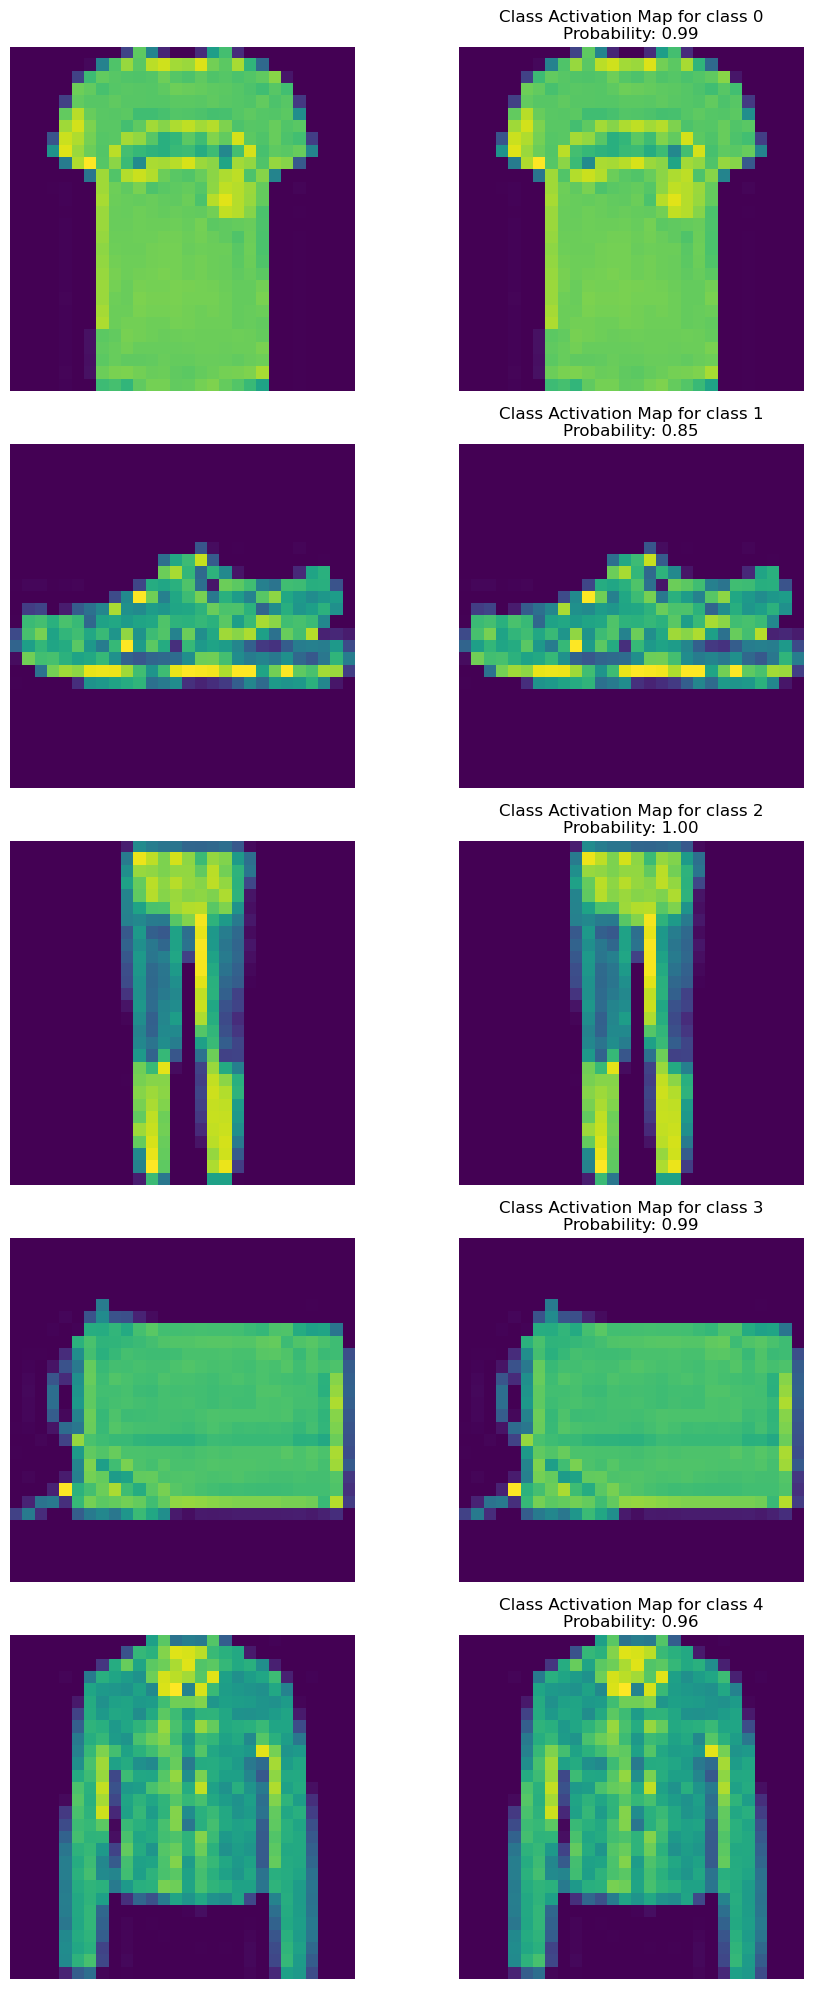

In [46]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# get the output tensor of the last convolutional layer
last_conv_layer = model_sgd_ed.layers[-3].output

# create a new model that outputs the feature maps and the classification probabilities
cam_model = tf.keras.models.Model(inputs=model_sgd_ed.inputs, outputs=[last_conv_layer, model_sgd_ed.output])

# choose 5 test images, each with a different unique class
class_indices = [np.where(y_test == i)[0][2] for i in range(5)]
images = X_test[class_indices]

# loop through the test images and plot the CAM for each one
fig, axes = plt.subplots(nrows=len(images), ncols=2, figsize=(10, 20))
for i, img in enumerate(images):
    # preprocess the image
    img = np.expand_dims(img, axis=0)

    # get the feature maps and the classification probabilities
    features, results = cam_model.predict(img)

    # get the weights of the last dense layer
    last_dense_layer = model_sgd_ed.get_layer('dense_8')
    last_dense_weights = last_dense_layer.get_weights()[0]

    # loop through all the classes and generate the CAM for each one
    unique_classes = np.unique(y_test)
    cam = None
    for j in unique_classes:
        # compute the CAM for the current class
        c = np.dot(features, last_dense_weights[:, j])

        # apply a ReLU activation
        c = np.maximum(c, 0)

        # normalize the CAM
        c = c / c.max()

        # weight the CAM by the classification probability
        w = results[0][j]
        if cam is None:
            cam = w * c
        else:
            cam += w * c

    # resize the CAM to the size of the original image
    cam = cv2.resize(cam, (img.shape[2], img.shape[1]))

    # plot the original image and the CAM
    ax1 = axes[i][0]
    ax1.imshow(img[0])
    ax1.axis('off')
    ax2 = axes[i][1]
    ax2.imshow(img[0])
    ax2.imshow(cam, cmap='jet', alpha=0.5)
    ax2.axis('off')
    ax2.set_title(f"Class Activation Map for class {np.argmax(results)}\nProbability: {np.max(results):.2f}")

plt.tight_layout()
plt.show()



1/1 [==============================] - 0s 76ms/step


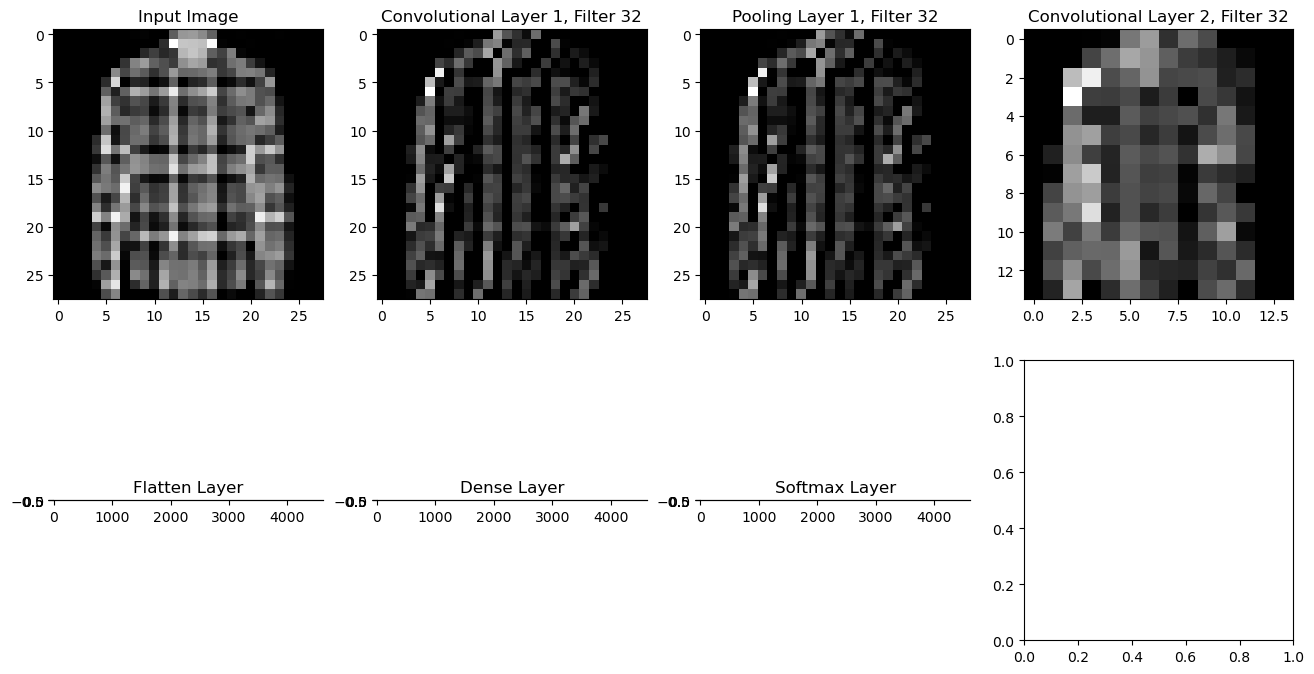

In [70]:
# Create a new model for each layer in the original model
model_conv1 = tf.keras.models.Model(inputs=model_sgd_ed.input, outputs=model_sgd_ed.layers[0].output)
model_pool1 = tf.keras.models.Model(inputs=model_sgd_ed.input, outputs=model_sgd_ed.layers[1].output)
model_conv2 = tf.keras.models.Model(inputs=model_sgd_ed.input, outputs=model_sgd_ed.layers[2].output)
model_flatten = tf.keras.models.Model(inputs=model_sgd_ed.input, outputs=model_sgd_ed.layers[3].output)
model_dense = tf.keras.models.Model(inputs=model_sgd_ed.input, outputs=model_sgd_ed.layers[4].output)
model_softmax = tf.keras.models.Model(inputs=model_sgd_ed.input, outputs=model_sgd_ed.layers[5].output)

# Get the output of each layer for a random test image
test_image = X_test[7]
conv1_output = model_conv1.predict(np.expand_dims(test_image, axis=0))
pool1_output = model_pool1.predict(np.expand_dims(test_image, axis=0))
conv2_output = model_conv2.predict(np.expand_dims(test_image, axis=0))
flatten_output = model_flatten.predict(np.expand_dims(test_image, axis=0))
dense_output = model_dense.predict(np.expand_dims(test_image, axis=0))
softmax_output = model_softmax.predict(np.expand_dims(test_image, axis=0))

# Plot the feature maps for each layer
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
axes[0, 0].imshow(test_image[:, :, 0], cmap='gray')
axes[0, 0].set_title('Input Image')
for i in range(32):
    axes[0, 1].imshow(conv1_output[0, :, :, i], cmap='gray')
    axes[0, 1].set_title('Convolutional Layer 1, Filter {}'.format(i+1))
    
for i in range(32):
    axes[0, 2].imshow(pool1_output[0, :, :, i], cmap='gray')
    axes[0, 2].set_title('Pooling Layer 1, Filter {}'.format(i+1))
    
conv2_filters = conv2_output.shape[3]
for i in range(conv2_filters):
    axes[0, 3].imshow(conv2_output[0, :, :, i], cmap='gray')
    axes[0, 3].set_title('Convolutional Layer 2, Filter {}'.format(i+1))

axes[1, 0].imshow(flatten_output.reshape((1, -1)), cmap='gray')
axes[1, 0].set_title('Flatten Layer')

axes[1, 1].imshow(dense_output.reshape((1, -1)), cmap='gray')
axes[1, 1].set_title('Dense Layer')

axes[1, 2].imshow(softmax_output.reshape((1, -1)), cmap='gray')
axes[1, 2].set_title('Softmax Layer')

plt.show()


1/1 [==============================] - 0s 53ms/step


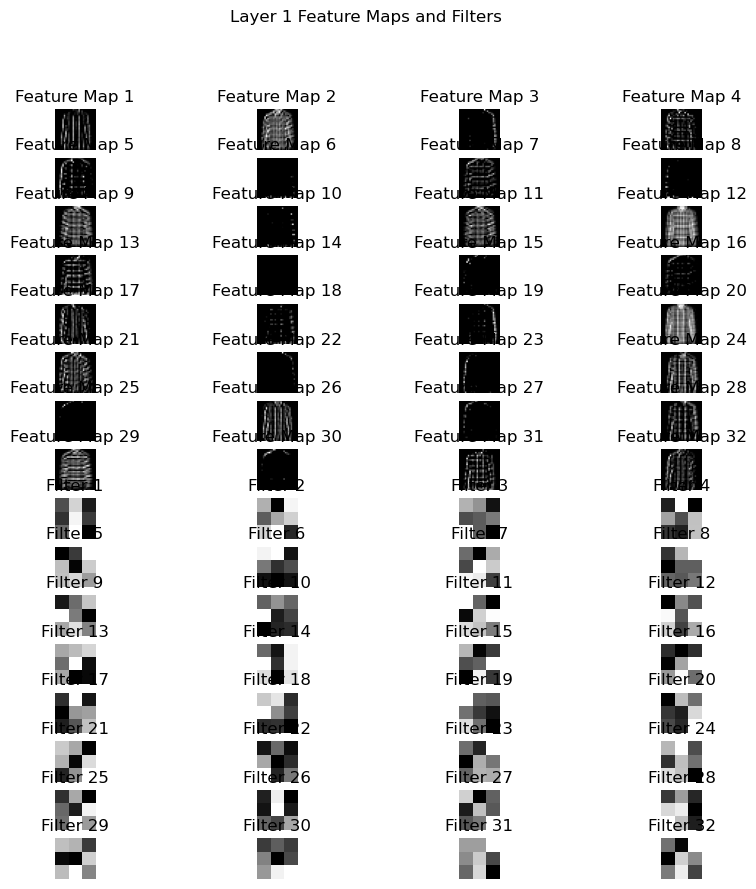

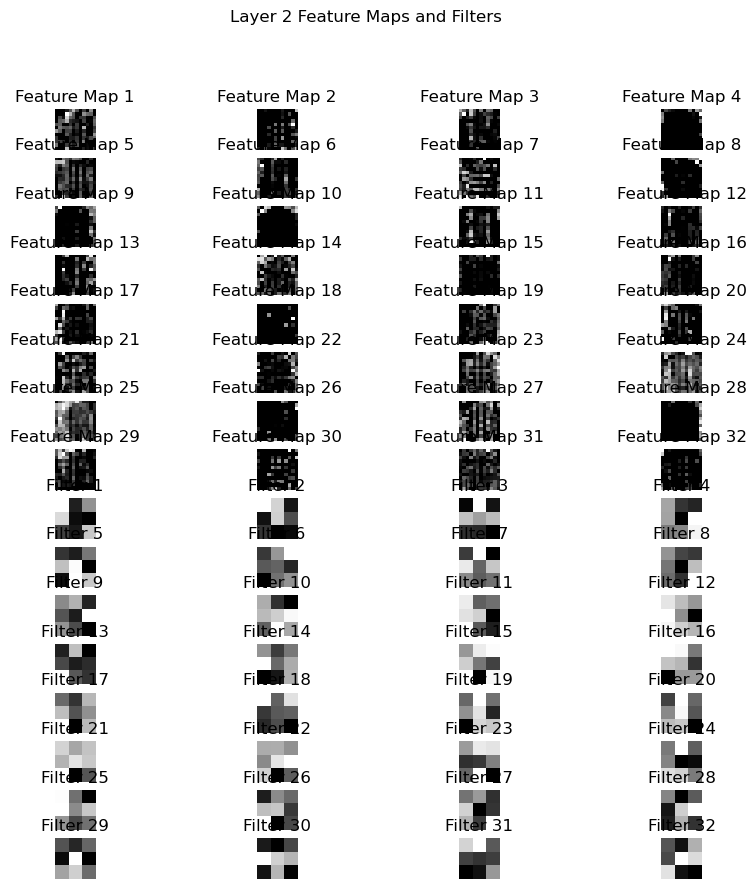

In [71]:
import matplotlib.pyplot as plt

# Get the outputs of all convolutional layers
conv_layers = [layer.output for layer in model_sgd_ed.layers if 'conv2d' in layer.name]

# Create a feature map visualization model
feat_map_model = tf.keras.models.Model(inputs=model_sgd_ed.inputs, outputs=conv_layers)

# Choose an input image to visualize feature maps
img_idx = 7
img = X_test[img_idx]
img = np.expand_dims(img, axis=0)

# Get the feature maps and filters of the input image
feat_maps = feat_map_model.predict(img)
filters = [layer.get_weights()[0] for layer in model_sgd_ed.layers if 'conv2d' in layer.name]

import math

# Plot the feature maps and filters for each layer in a single figure
for i, (feat_map, filt) in enumerate(zip(feat_maps, filters)):
    # Calculate the number of rows and columns needed for the subplots
    num_filters = feat_map.shape[3] + filt.shape[3]
    num_rows = math.ceil(num_filters / 4)
    num_cols = min(num_filters, 4)
    
    # Create a new figure
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(10, 10))
    fig.suptitle('Layer {} Feature Maps and Filters'.format(i+1))
    # Plot the feature maps
    for j in range(feat_map.shape[3]):
        row = j // 4
        col = j % 4
        axs[row, col].imshow(feat_map[0,:,:,j], cmap='gray')
        axs[row, col].axis('off')
        axs[row, col].set_title('Feature Map {}'.format(j+1))
    # Plot the filters
    for j in range(filt.shape[3]):
        row = (j + feat_map.shape[3]) // 4
        col = (j + feat_map.shape[3]) % 4
        axs[row, col].imshow(filt[:,:,0,j], cmap='gray')
        axs[row, col].axis('off')
        axs[row, col].set_title('Filter {}'.format(j+1))
    plt.show()


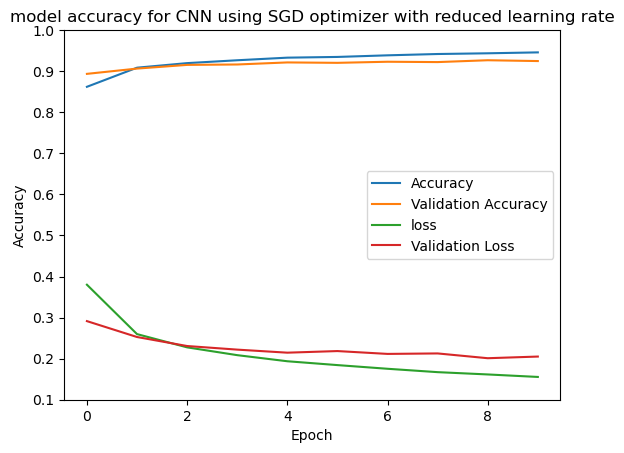

In [72]:
import matplotlib.pyplot as plt
plt.plot(history_sgd_ed.history["accuracy"])
plt.plot(history_sgd_ed.history['val_accuracy'])
plt.plot(history_sgd_ed.history['loss'], label = 'Training Loss')
plt.plot(history_sgd_ed.history['val_loss'], label = 'Validation Loss')
plt.title("model accuracy for CNN using SGD optimizer with reduced learning rate")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.ylim([0.1, 1.0])
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()

313/313 [==============================] - 1s 2ms/step


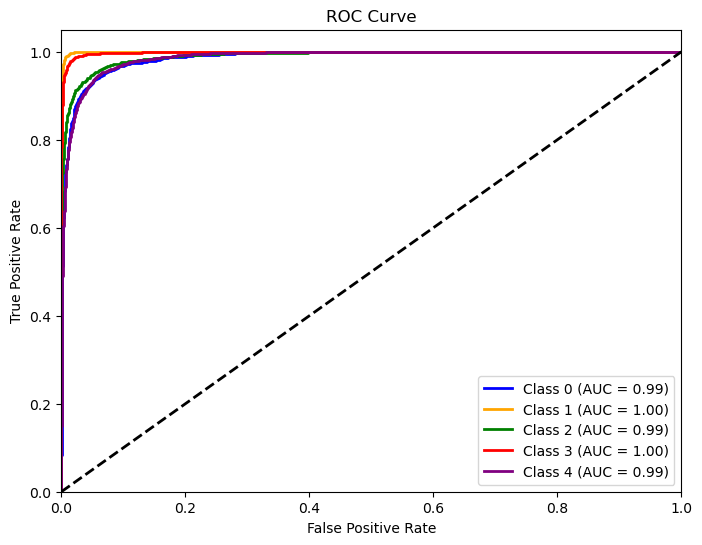

In [73]:
from sklearn.metrics import roc_curve, roc_auc_score

# Get the model's predicted probabilities for each class
Y_pred_proba = model_sgd_ed.predict(X_test)

# Compute the ROC curves and AUC scores for each class
fpr = {}
tpr = {}
roc_auc = {}
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_test[:, i], Y_pred_proba[:, i])
    roc_auc[i] = roc_auc_score(Y_test[:, i], Y_pred_proba[:, i])

# Plot the ROC curves for each class
plt.figure(figsize=(8, 6))
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']
for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], color=colors[i], lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


313/313 [==============================] - 0s 1ms/step


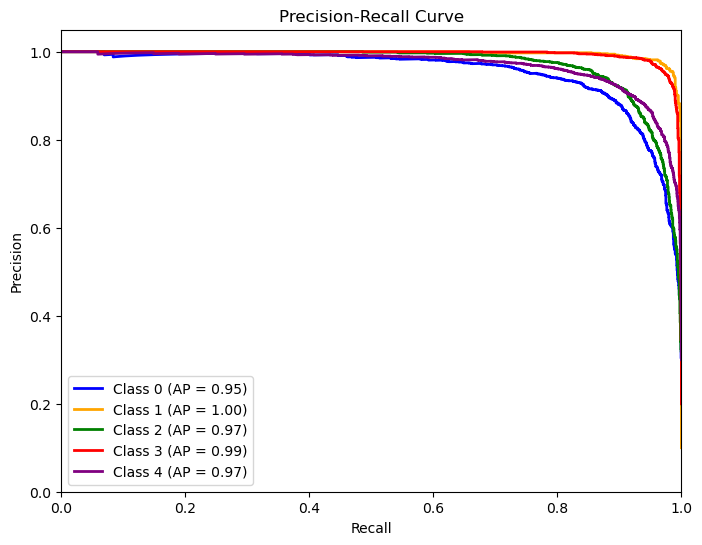

In [74]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# Get the model's predicted probabilities for each class
Y_pred_proba = model_sgd_ed.predict(X_test)

# Compute the precision-recall curves and average precision scores for each class
precision = {}
recall = {}
average_precision = {}
for i in range(num_classes):
    precision[i], recall[i], _ = precision_recall_curve(Y_test[:, i], Y_pred_proba[:, i])
    average_precision[i] = average_precision_score(Y_test[:, i], Y_pred_proba[:, i])

# Plot the precision-recall curves for each class
plt.figure(figsize=(8, 6))
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']
for i in range(num_classes):
    plt.plot(recall[i], precision[i], color=colors[i], lw=2, label=f'Class {i} (AP = {average_precision[i]:.2f})')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()


313/313 [==============================] - 0s 1ms/step


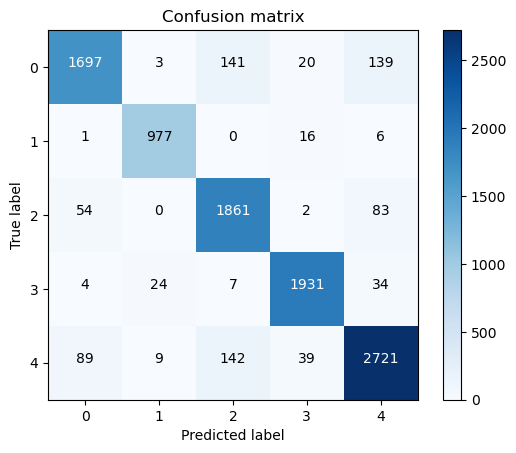

In [75]:
from sklearn.metrics import confusion_matrix

# Get the model's predictions on the test set
Y_pred = model_sgd_ed.predict(X_test)

# Convert the one-hot encoded labels to class indices
Y_true = np.argmax(Y_test, axis=1)
Y_pred = np.argmax(Y_pred, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(Y_true, Y_pred)

# Plot the confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion matrix')
plt.colorbar()

# Add values to the plot
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > cm.max() / 2 else "black")

plt.xticks(np.arange(5), np.arange(5))
plt.yticks(np.arange(5), np.arange(5))
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()


In [78]:
# Define the model architecture

def lr_schedule(epoch):
    initial_learning_rate = 0.001
    decay_rate = 0.1
    decay_steps = 10000
    learning_rate = initial_learning_rate * math.pow(decay_rate, math.floor((1+epoch)/decay_steps))
    return learning_rate

model_sgd_ed_5filter = Sequential()
model_sgd_ed_5filter.add(Conv2D(32, (3, 3), activation='relu', strides=(1, 1), padding='same', input_shape=(Img_size, Img_size, 1)))
model_sgd_ed_5filter.add(BatchNormalization())  # Add batch normalization layer
model_sgd_ed_5filter.add(MaxPooling2D((3, 3)))
model_sgd_ed_5filter.add(Conv2D(64, (3, 3), activation='relu'))
model_sgd_ed_5filter.add(BatchNormalization())  # Add batch normalization layer
model_sgd_ed_5filter.add(Conv2D(128, (3, 3), activation='relu'))
model_sgd_ed_5filter.add(BatchNormalization())  # Add batch normalization layer
model_sgd_ed_5filter.add(Conv2D(256, (3, 3), activation='relu'))
model_sgd_ed_5filter.add(BatchNormalization())  # Add batch normalization layer
model_sgd_ed_5filter.add(Conv2D(512, (3, 3), activation='relu'))
model_sgd_ed_5filter.add(BatchNormalization())  # Add batch normalization layer
model_sgd_ed_5filter.add(Flatten())
model_sgd_ed_5filter.add(Dense(5))
model_sgd_ed_5filter.add(Activation('softmax'))


# lr_schedule = keras.optimizers.schedules.ExponentialDecay(
#     initial_learning_rate=1e-3,
#     decay_steps=10000,
#     decay_rate=0.9)
# opt = keras.optimizers.Adam(learning_rate=lr_schedule)
# sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
sgd = SGD()
model_sgd_ed_5filter.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=sgd)
lr_scheduler = LearningRateScheduler(lr_schedule)
history_sgd_ed_5filter = model_sgd_ed_5filter.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, validation_split = 0.1, verbose=1, callbacks=[lr_scheduler])

score = model_sgd_ed_5filter.evaluate(X_test, Y_test, verbose=1)
print('Test accuracy:', score[1]*100)

Epoch 1/10
2700/2700 [==============================] - 14s 5ms/step - loss: 0.4099 - accuracy: 0.8544 - val_loss: 0.2758 - val_accuracy: 0.9015 - lr: 0.0010
Epoch 2/10
2700/2700 [==============================] - 13s 5ms/step - loss: 0.2576 - accuracy: 0.9094 - val_loss: 0.2393 - val_accuracy: 0.9108 - lr: 0.0010
Epoch 3/10
2700/2700 [==============================] - 12s 5ms/step - loss: 0.2110 - accuracy: 0.9257 - val_loss: 0.2253 - val_accuracy: 0.9167 - lr: 0.0010
Epoch 4/10
2700/2700 [==============================] - 13s 5ms/step - loss: 0.1776 - accuracy: 0.9377 - val_loss: 0.2275 - val_accuracy: 0.9172 - lr: 0.0010
Epoch 5/10
2700/2700 [==============================] - 12s 5ms/step - loss: 0.1572 - accuracy: 0.9450 - val_loss: 0.2072 - val_accuracy: 0.9238 - lr: 0.0010
Epoch 6/10
2700/2700 [==============================] - 13s 5ms/step - loss: 0.1380 - accuracy: 0.9520 - val_loss: 0.2115 - val_accuracy: 0.9248 - lr: 0.0010
Epoch 7/10
2700/2700 [==============================

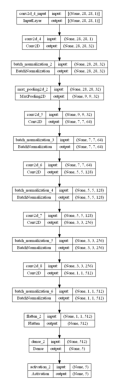

In [77]:
from keras.utils.vis_utils import plot_model
# Plot the model graph
plot_model(model_sgd_ed_5filter, show_shapes=True, show_layer_names=True, to_file=r'C:\Users\15485\Desktop\UWaterloo_Academics\ECE657A\Assignments\Assignment3\model_sgd_ed_5filter.png')
img = plt.imread(r'C:\Users\15485\Desktop\UWaterloo_Academics\ECE657A\Assignments\Assignment3\model_sgd_ed_5filter.png')
plt.imshow(img)
plt.axis('off')
plt.show()

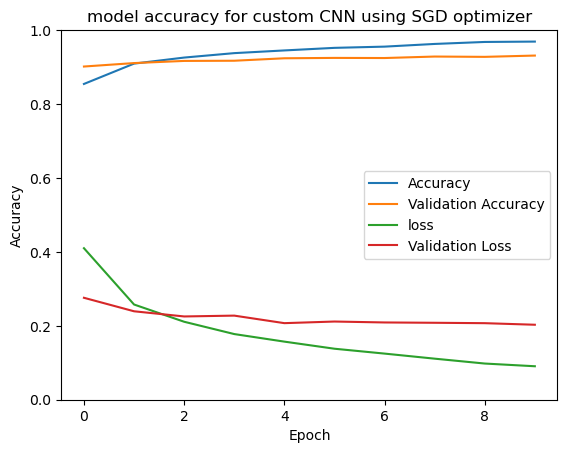

In [81]:
import matplotlib.pyplot as plt
plt.plot(history_sgd_ed_5filter.history["accuracy"])
plt.plot(history_sgd_ed_5filter.history['val_accuracy'])
plt.plot(history_sgd_ed_5filter.history['loss'])
plt.plot(history_sgd_ed_5filter.history['val_loss'])
plt.title("model accuracy for custom CNN using SGD optimizer")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.ylim([0.0, 1.0])
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()

In [ ]:
# Define the CNN model
model_adam = Sequential()
model_adam.add(Conv2D(32, (3, 3), activation='relu', strides=(1, 1), padding='same', input_shape=(Img_size, Img_size, 1)))
model_adam.add(MaxPooling2D((2, 2)))
model_adam.add(Conv2D(32, (3, 3), activation='relu'))
model_adam.add(Flatten())
model_adam.add(Dense(5))
model_adam.add(Activation('softmax'))
#model_adam.summary()

# lr_schedule = keras.optimizers.schedules.ExponentialDecay(
#     initial_learning_rate=1e-3,
#     decay_steps=10000,
#     decay_rate=0.9)
adam = Adam()
model_adam.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=adam)
lr_scheduler = LearningRateScheduler(lr_schedule)
history_adam = model_adam.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, validation_split = 0.1, verbose=1, callbacks=[lr_scheduler])

score = model_adam.evaluate(X_test, Y_test, verbose=1)
print('Test accuracy:', score[1]*100)

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history_adam.history["accuracy"])
plt.plot(history_adam.history['val_accuracy'])
plt.plot(history_adam.history['loss'], label = 'Training Loss')
plt.plot(history_adam.history['val_loss'], label = 'Validation Loss')
plt.title("model accuracy for CNN using ADAM optimizer")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.ylim([0.1, 1.0])
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()

In [26]:
# Define the CNN model
model_vgg16 = Sequential()
model_vgg16.add(Conv2D(64, (3, 3), activation='relu', strides=(1, 1), padding='same', input_shape=(Img_size, Img_size, 1)))
model_vgg16.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model_vgg16.add(MaxPooling2D((2, 2), strides=(2,2)))
model_vgg16.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model_vgg16.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model_vgg16.add(MaxPooling2D((2, 2), strides=(2,2)))
model_vgg16.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model_vgg16.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model_vgg16.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model_vgg16.add(MaxPooling2D((2, 2), strides=(2,2)))
model_vgg16.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model_vgg16.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model_vgg16.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model_vgg16.add(MaxPooling2D((2, 2), strides=(2,2)))
model_vgg16.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model_vgg16.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model_vgg16.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
# model_vgg16.add(MaxPooling2D((2, 2), strides=(2,2)))
model_vgg16.add(Flatten())
model_vgg16.add(Dense(4096, activation='relu'))
model_vgg16.add(Dense(4096, activation='relu'))
model_vgg16.add(Dense(5, activation='softmax'))
# model_adam.add(Activation('softmax'))

#model_vgg16.summary()

# adam = Adam()
opt = SGD()
model_vgg16.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=opt)
lr_scheduler = LearningRateScheduler(lr_schedule)
history_vgg16 = model_vgg16.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, validation_split = 0.1, verbose=1, callbacks=[lr_scheduler])

score = model_vgg16.evaluate(X_test, Y_test, verbose=1)
print('Test accuracy:', score[1]*100)

Epoch 1/10
2700/2700 [==============================] - 64s 23ms/step - loss: 1.5375 - accuracy: 0.3078 - val_loss: 1.1224 - val_accuracy: 0.5625 - lr: 0.0010
Epoch 2/10
2700/2700 [==============================] - 62s 23ms/step - loss: 0.8046 - accuracy: 0.6485 - val_loss: 0.5882 - val_accuracy: 0.7588 - lr: 0.0010
Epoch 3/10
2700/2700 [==============================] - 62s 23ms/step - loss: 0.5501 - accuracy: 0.7783 - val_loss: 0.4414 - val_accuracy: 0.8362 - lr: 0.0010
Epoch 4/10
2700/2700 [==============================] - 98s 36ms/step - loss: 0.4347 - accuracy: 0.8337 - val_loss: 0.3724 - val_accuracy: 0.8652 - lr: 0.0010
Epoch 5/10
2700/2700 [==============================] - 98s 36ms/step - loss: 0.3700 - accuracy: 0.8618 - val_loss: 0.3554 - val_accuracy: 0.8720 - lr: 0.0010
Epoch 6/10
2700/2700 [==============================] - 97s 36ms/step - loss: 0.3282 - accuracy: 0.8783 - val_loss: 0.3141 - val_accuracy: 0.8885 - lr: 0.0010
Epoch 7/10
2700/2700 [========================

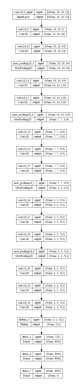

In [83]:
from keras.utils.vis_utils import plot_model
# Plot the model graph
plot_model(model_vgg16, show_shapes=True, show_layer_names=True, to_file=r'C:\Users\15485\Desktop\UWaterloo_Academics\ECE657A\Assignments\Assignment3\model_vgg16.png')
img = plt.imread(r'C:\Users\15485\Desktop\UWaterloo_Academics\ECE657A\Assignments\Assignment3\model_vgg16.png')
plt.imshow(img)
plt.axis('off')
plt.show()

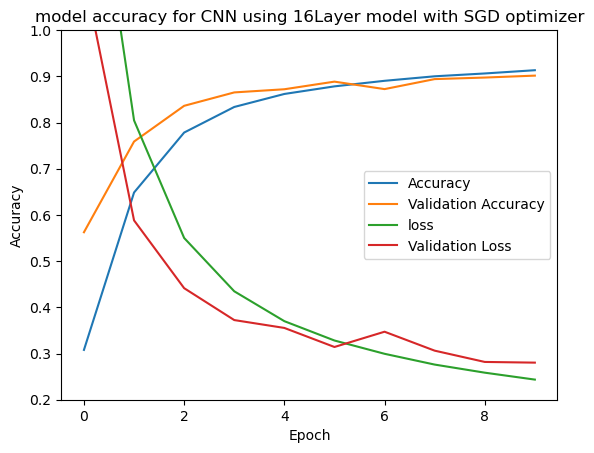

In [82]:
import matplotlib.pyplot as plt
plt.plot(history_vgg16.history["accuracy"], label='accuracy')
plt.plot(history_vgg16.history['val_accuracy'], label = 'val_accuracy')
plt.plot(history_vgg16.history['loss'], label = 'Training Loss')
plt.plot(history_vgg16.history['val_loss'], label = 'Validation Loss')
plt.title("model accuracy for CNN using 16Layer model with SGD optimizer")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.ylim([0.2, 1.0])
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()

model_sgd_ed.input shape: (None, 28, 28, 1)
model_sgd_ed.get_layer('flatten_1') output shape: (None, 4608)
X_test shape: (10000, 28, 28, 1)
313/313 [==============================] - 0s 1ms/step
features shape: (10000, 4608)


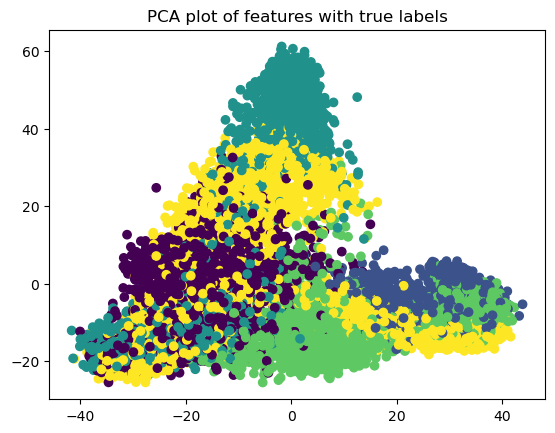

C:\Users\15485\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


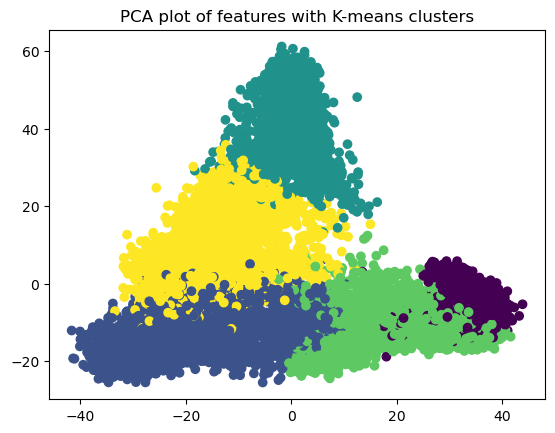

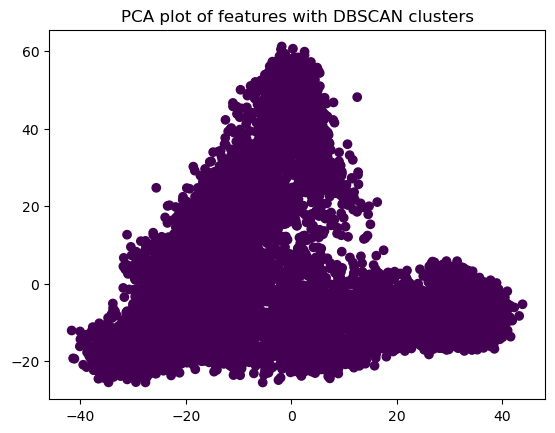

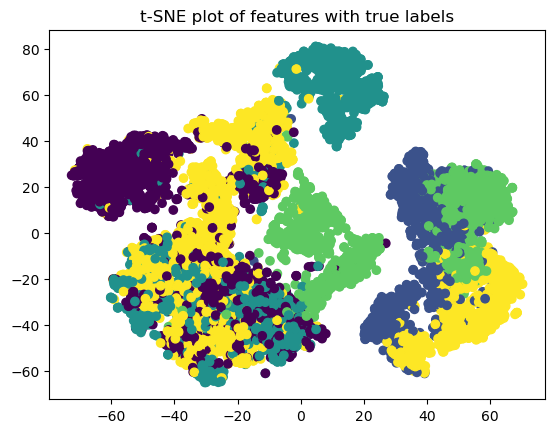

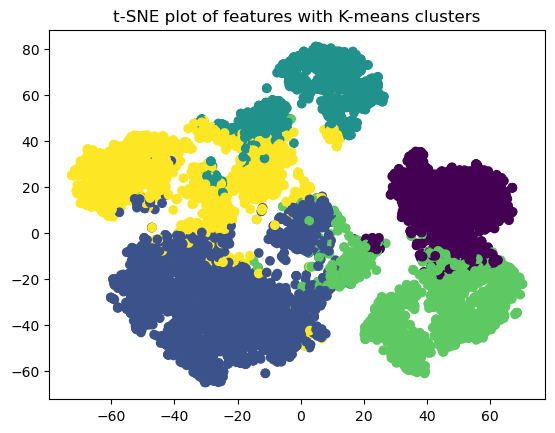

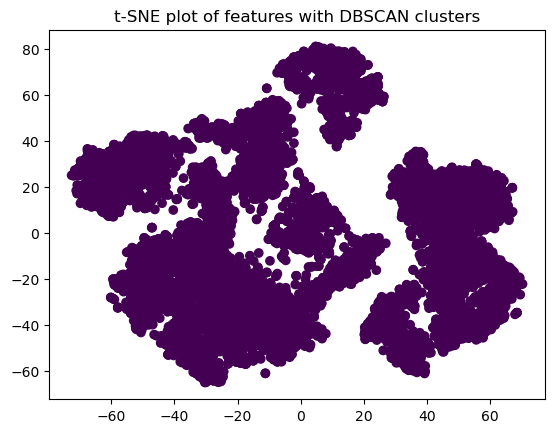

In [30]:
from keras.models import Model

print(f"model_sgd_ed.input shape: {model_sgd_ed.input.shape}")
print(f"model_sgd_ed.get_layer('flatten_1') output shape: {model_sgd_ed.get_layer('flatten_1').output.shape}")

# Define the intermediate layer model
intermediate_layer_model = tf.keras.models.Model(inputs=model_sgd_ed.input, outputs=model_sgd_ed.get_layer('flatten_1').output)

# Extract the features for all the images in the test set
print(f"X_test shape: {X_test.shape}")

# Extract the features for all the images in the test set
features = intermediate_layer_model.predict(X_test)

print(f"features shape: {features.shape}")

import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN, KMeans
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Visualize the encoding using PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(features)
labels = np.argmax(Y_test, axis=1)
plt.scatter(pca_result[:,0], pca_result[:,1], c=labels)
plt.title("PCA plot of features with true labels")
plt.show()

# Perform K-means clustering
kmeans = KMeans(n_clusters=5)
kmeans_clusters = kmeans.fit_predict(features)

plt.scatter(pca_result[:,0], pca_result[:,1], c=kmeans_clusters)
plt.title("PCA plot of features with K-means clusters")
plt.show()

# Perform DBSCAN clustering
dbscan = DBSCAN(eps=2, min_samples=5)
dbscan_clusters = dbscan.fit_predict(features)

# Visualize the clustering results using PCA
plt.scatter(pca_result[:,0], pca_result[:,1], c=dbscan_clusters)
plt.title("PCA plot of features with DBSCAN clusters")
plt.show()

# Apply t-SNE on the features
tsne = TSNE(n_components=2, perplexity=30, learning_rate=200)
tsne_result = tsne.fit_transform(features)

# Visualize the t-SNE result
plt.scatter(tsne_result[:,0], tsne_result[:,1], c=labels)
plt.title("t-SNE plot of features with true labels")
plt.show()

plt.scatter(tsne_result[:,0], tsne_result[:,1], c=kmeans_clusters)
plt.title("t-SNE plot of features with K-means clusters")
plt.show()

plt.scatter(tsne_result[:,0], tsne_result[:,1], c=dbscan_clusters)
plt.title("t-SNE plot of features with DBSCAN clusters")
plt.show()
